<a href="https://colab.research.google.com/github/mkgreen/Orthopedic-Patients-Classification-KNN-NB/blob/main/ortho_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
# section 1: accessing the data
# Make a pandas DataFrame from the CSV
data = pd.read_csv("/content/ortho_knnnb.csv")

In [ ]:
# How many variables does the dataset contain?
print(len(data.columns))

7


In [ ]:
# What is the data about?
data.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [ ]:
# Section II : Exploratory Data Analysis

data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [ ]:
data['class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

In [ ]:
data.isna().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

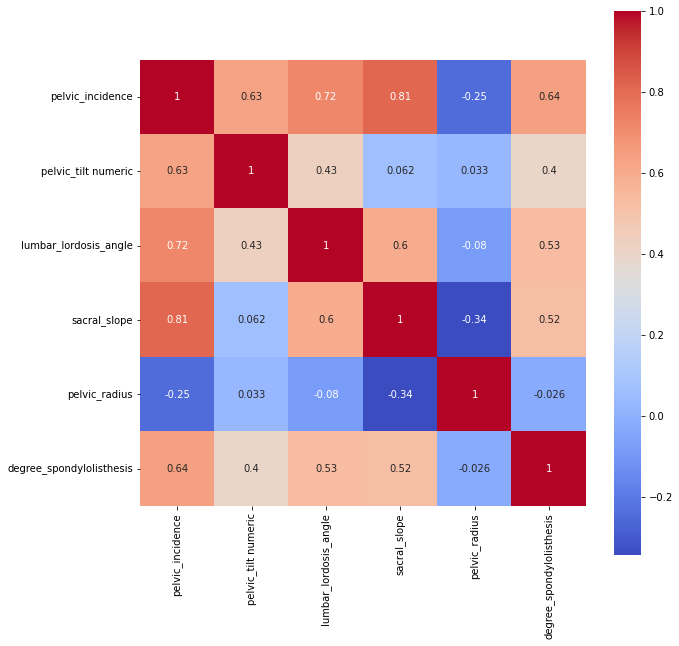

In [ ]:
corr = data.corr()
# print(corr)
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='coolwarm',square=True)

In [ ]:
# filter the numerical features in the dataset 
# using select_dtypes()
# include=np.number: selects the numeric features
data_numeric = data.select_dtypes(include=np.number)

#display the numeric features
data_numeric.columns

Index(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis'],
      dtype='object')

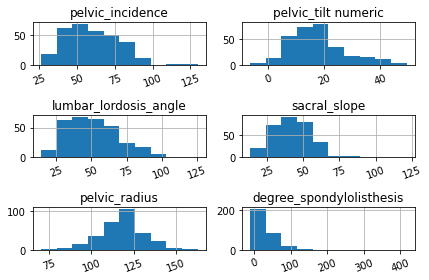

In [ ]:
data.hist(xrot =20,)

plt.tight_layout()

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


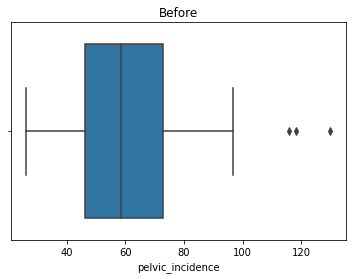

In [ ]:
sns.boxplot(data['pelvic_incidence'])
plt.title('Before') # before eda/cleaning
plt.show()

In [ ]:
df1 = data
df2 = data

In [ ]:
df1.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [ ]:
df2.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [ ]:
df2.isna().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [ ]:
Q1 = np.percentile(data['pelvic_incidence'], 25, interpolation = 'midpoint')
Q2 = np.percentile(data['pelvic_incidence'], 50, interpolation = 'midpoint')
Q3 = np.percentile(data['pelvic_incidence'], 75, interpolation = 'midpoint')
print(f'(Q1) 25 percentile of the pelvic_incidence data: {Q1}')
print(f'(Q2) 50 percentile of the pelvic_incidence data: {Q2}')
print(f'(Q3) 75 percentile of the pelvic_incidence data: {Q3}')
print("")
IQR = Q3 - Q1
print(f'Interquartile range is {IQR}')
low_lim = Q1 -1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print(f'low limit: {low_lim}')
print(f'upper limit: {up_lim}')

(Q1) 25 percentile of the pelvic_incidence data: 46.43422228
(Q2) 50 percentile of the pelvic_incidence data: 58.691038135
(Q3) 75 percentile of the pelvic_incidence data: 72.79974705000001

Interquartile range is 26.365524770000007
low limit: 6.885935124999989
upper limit: 112.34803420500002


In [ ]:
df2['pelvic_incidence'] = df2['pelvic_incidence'][df2.pelvic_incidence< up_lim]
df2['pelvic_incidence']=df2['pelvic_incidence'][df2.pelvic_incidence> low_lim]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


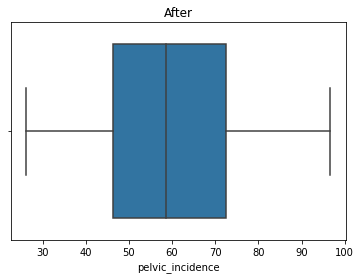

In [ ]:
sns.boxplot(df2['pelvic_incidence'])
plt.title('After') # after eda/cleaning
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


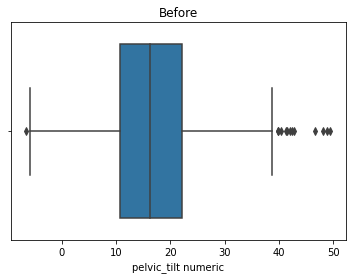

In [ ]:
sns.boxplot(df2['pelvic_tilt numeric'])
plt.title('Before') # before eda/cleaning
plt.show()

In [ ]:
Q1 = np.percentile(data['pelvic_tilt numeric'], 25, interpolation = 'midpoint')
Q2 = np.percentile(data['pelvic_tilt numeric'], 50, interpolation = 'midpoint')
Q3 = np.percentile(data['pelvic_tilt numeric'], 75, interpolation = 'midpoint')
print(f'(Q1) 25 percentile of the pelvic_tilt data: {Q1}')
print(f'(Q2) 50 percentile of the pelvic_tilt data: {Q2}')
print(f'(Q3) 75 percentile of the pelvic_tilt data: {Q3}')
print("")
IQR = Q3 - Q1
print(f'Interquartile range is {IQR}')
low_lim = Q1 -1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print(f'low limit: {low_lim}')
print(f'upper limit: {up_lim}')

(Q1) 25 percentile of the pelvic_tilt data: 10.67427877
(Q2) 50 percentile of the pelvic_tilt data: 16.35768863
(Q3) 75 percentile of the pelvic_tilt data: 22.05899168

Interquartile range is 11.384712909999998
low limit: -6.4027905949999955
upper limit: 39.13606104499999


In [ ]:
df2['pelvic_tilt numeric']= df2['pelvic_tilt numeric'][df2['pelvic_tilt numeric']< up_lim]
df2['pelvic_tilt numeric']=df2['pelvic_tilt numeric'][df2['pelvic_tilt numeric']> low_lim]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


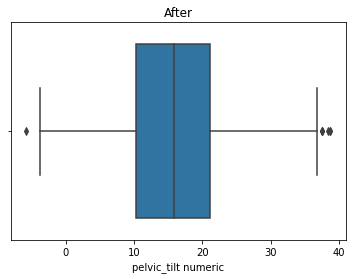

In [ ]:
sns.boxplot(df2['pelvic_tilt numeric'])
plt.title('After') # after eda/cleaning
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


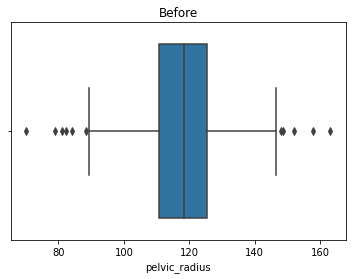

In [ ]:
sns.boxplot(df2['pelvic_radius'])
plt.title('Before') # before eda/cleaning
plt.show()

In [ ]:
Q1 = np.percentile(data['pelvic_radius'], 25, interpolation = 'midpoint')
Q2 = np.percentile(data['pelvic_radius'], 50, interpolation = 'midpoint')
Q3 = np.percentile(data['pelvic_radius'], 75, interpolation = 'midpoint')
print(f'(Q1) 25 percentile of the pelvic_radius data: {Q1}')
print(f'(Q2) 50 percentile of the pelvic_radius data: {Q2}')
print(f'(Q3) 75 percentile of the pelvic_radius data: {Q3}')
print("")
IQR = Q3 - Q1
print(f'Interquartile range is {IQR}')
low_lim = Q1 -1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print(f'low limit: {low_lim}')
print(f'upper limit: {up_lim}')

(Q1) 25 percentile of the pelvic_radius data: 110.70943489999999
(Q2) 50 percentile of the pelvic_radius data: 118.2681783
(Q3) 75 percentile of the pelvic_radius data: 125.45517495

Interquartile range is 14.745740050000009
low limit: 88.59082482499997
upper limit: 147.573785025


In [ ]:
df2['pelvic_radius']= df2['pelvic_radius'][df2['pelvic_radius']< up_lim]
df2['pelvic_radius']= df2['pelvic_radius'][df2['pelvic_radius']> low_lim]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


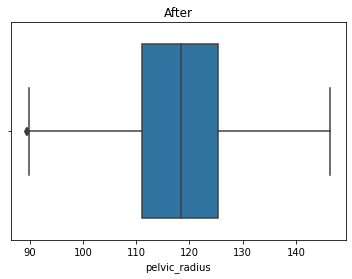

In [ ]:
sns.boxplot(df2['pelvic_radius'])
plt.title('After') # after eda/cleaning
plt.show()

In [ ]:
df2.isna().sum()

pelvic_incidence             3
pelvic_tilt numeric         13
lumbar_lordosis_angle        0
sacral_slope                 0
pelvic_radius               11
degree_spondylolisthesis     0
class                        0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


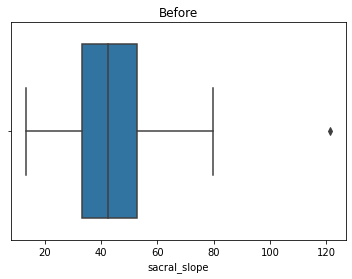

In [ ]:
sns.boxplot(df2['sacral_slope'])
plt.title('Before') # before eda/cleaning
plt.show()

In [ ]:
Q1 = np.percentile(data['sacral_slope'], 25, interpolation = 'midpoint')
Q2 = np.percentile(data['sacral_slope'], 50, interpolation = 'midpoint')
Q3 = np.percentile(data['sacral_slope'], 75, interpolation = 'midpoint')
print(f'(Q1) 25 percentile of the sacral_slope data: {Q1}')
print(f'(Q2) 50 percentile of the sacral_slope data: {Q2}')
print(f'(Q3) 75 percentile of the sacral_slope data: {Q3}')
print("")
IQR = Q3 - Q1
print(f'Interquartile range is {IQR}')
low_lim = Q1 -1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print(f'low limit: {low_lim}')
print(f'upper limit: {up_lim}')

(Q1) 25 percentile of the sacral_slope data: 33.353536675
(Q2) 50 percentile of the sacral_slope data: 42.404912075
(Q3) 75 percentile of the sacral_slope data: 52.64706616

Interquartile range is 19.293529485
low limit: 4.4132424475
upper limit: 81.5873603875


In [ ]:
df2['sacral_slope']= df2['sacral_slope'][df2['sacral_slope']< up_lim]
df2['sacral_slope']= df2['sacral_slope'][df2['sacral_slope']> low_lim]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


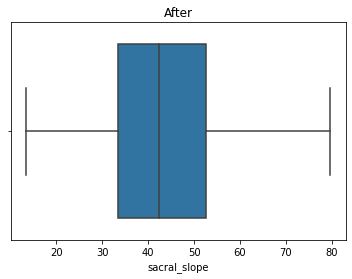

In [ ]:
sns.boxplot(df2['sacral_slope'])
plt.title('After') # after eda/cleaning
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


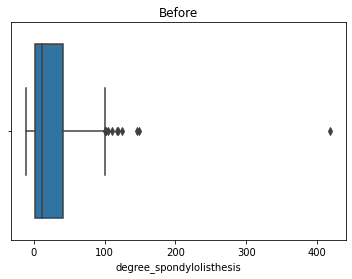

In [ ]:
sns.boxplot(df2['degree_spondylolisthesis'])
plt.title('Before') # before eda/cleaning
plt.show()

In [ ]:
Q1 = np.percentile(data['degree_spondylolisthesis'], 25, interpolation = 'midpoint')
Q2 = np.percentile(data['degree_spondylolisthesis'], 50, interpolation = 'midpoint')
Q3 = np.percentile(data['degree_spondylolisthesis'], 75, interpolation = 'midpoint')
print(f'(Q1) 25 percentile of the degree_spondylolisthesis data: {Q1}')
print(f'(Q2) 50 percentile of the degree_spondylolisthesis data: {Q2}')
print(f'(Q3) 75 percentile of the degree_spondylolisthesis data: {Q3}')
print("")
IQR = Q3 - Q1
print(f'Interquartile range is {IQR}')
low_lim = Q1 -1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print(f'low limit: {low_lim}')
print(f'upper limit: {up_lim}')

(Q1) 25 percentile of the degree_spondylolisthesis data: 1.6127056185000002
(Q2) 50 percentile of the degree_spondylolisthesis data: 11.767933769999999
(Q3) 75 percentile of the degree_spondylolisthesis data: 41.151875485000005

Interquartile range is 39.5391698665
low limit: -57.696049181250004
upper limit: 100.46063028475001


In [ ]:
df2['degree_spondylolisthesis']= df2['degree_spondylolisthesis'][df2['degree_spondylolisthesis']< up_lim]
df2['degree_spondylolisthesis']= df2['degree_spondylolisthesis'][df2['degree_spondylolisthesis']> low_lim]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


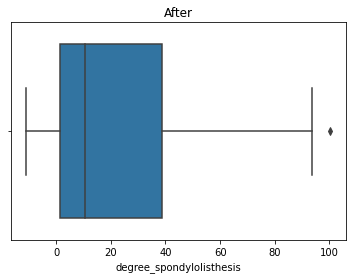

In [ ]:
sns.boxplot(df2['degree_spondylolisthesis'])
plt.title('After') # after eda/cleaning
plt.show()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          307 non-null    float64
 1   pelvic_tilt numeric       297 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              309 non-null    float64
 4   pelvic_radius             299 non-null    float64
 5   degree_spondylolisthesis  300 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [ ]:
df2.isna().sum()

pelvic_incidence             3
pelvic_tilt numeric         13
lumbar_lordosis_angle        0
sacral_slope                 1
pelvic_radius               11
degree_spondylolisthesis    10
class                        0
dtype: int64

In [ ]:
df2.fillna(value=df2.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [ ]:
df2.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [ ]:
data['class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

In [ ]:
df2['class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

In [ ]:
data.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [ ]:
df2.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [ ]:
df2['class']=df2['class'].map({'Abnormal':1,'Normal':0})

In [ ]:
df2.isna().sum()

pelvic_incidence             3
pelvic_tilt numeric         13
lumbar_lordosis_angle        0
sacral_slope                 1
pelvic_radius               11
degree_spondylolisthesis    10
class                        0
dtype: int64

In [ ]:
df2 = df2.fillna(value=df2.mean())

In [ ]:
df2.astype('float64')

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1.0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1.0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1.0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1.0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1.0
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.0


In [ ]:
df2.isna().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [ ]:
X=df2.iloc[:,:-1]
y=df2['class']

In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [ ]:
X.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X1=min_max_scaler.fit_transform(X)
X=pd.DataFrame(X1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print('Accuracy score:',accuracy_score(y_test, y_pred))
# Accuracy score: 0.8225806451612904

Accuracy score: 0.7741935483870968


In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print('Accuracy score:',accuracy_score(y_test, y_pred))
# Accuracy score: 0.8870967741935484

Accuracy score: 0.8225806451612904


In [ ]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print('Accuracy score:',accuracy_score(y_test, y_pred))
# Accuracy score: 0.8225806451612904

Accuracy score: 0.7741935483870968


In [ ]:
# knn = KNeighborsClassifier(n_neighbors=9)
# knn.fit(x_train, y_train)
# y_pred = knn.predict(x_test)
# print('Accuracy score:',accuracy_score(y_test, y_pred))
# # Accuracy score: 0.8870967741935484

In [ ]:
# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(x_train, y_train)
# y_pred = knn.predict(x_test)
# print('Accuracy score:',accuracy_score(y_test, y_pred))
# # Accuracy score: 0.8387096774193549


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(x_train, y_train)

GaussianNB()

In [ ]:
#Predicting the Test set results
y_pred = nvclassifier.predict(x_test)
# print(y_pred)

In [ ]:
print("Accuracy score:",accuracy_score(y_test, y_pred))

Accuracy score: 0.7741935483870968


In [ ]:
nb_score = (accuracy_score(y_test, y_pred)) *100
print(f"NB gives a less score of {round(nb_score)}%.")

NB gives a less score of 77%.
